# Homework 1 
## 23/03/2022
### Federica Valeau, Tommaso Di Mario, Valeria Sepicacchi.

## Exercise 1: It's Prob-time (...again-.-)!
$$
f_{(X,Y)} = \begin{cases}
        8 \cdot (x) \cdot (z) & for \: 0 < z < x < 1,\\
        0 & otherwise. \\
    \end{cases}
$$
#### 1)
To check if this is a legit pdf we have to first check that 
- the pdf is always positive: this is always true since the support of both x and z is stricly positive
- the pdf integrates to one 
  
    $$ 
    \int_{0}^{1} \int_{0}^{x} 8 \cdot (x) \cdot (z) \; dx dz = 
    \int_{0}^{1} 8 \cdot (x) \cdot \frac{z^2}{2}\Big|_{0}^{x} \; dx dz = 
    \int_{0}^{1} 4 \cdot (x^3) = 4 \cdot \left[\frac{x^4}{4}\right]_{0}^{1} = 1 - 0 = 1

    $$
    
[comment]: <> (\text{I\kern-0.15em P})

To find the proportion of the students we have to evaluate $\text{I\kern-0.15em P}(Z < 0.5)$ we computed this in two ways:
- using the joint probability
  $$ \int_{1/2}^{1} \int_{z}^{1} 8 \cdot (x) \cdot (z) \; dx dz = 
         \int_{1/2}^{1} 8 \cdot z \cdot \left[\frac{x^2}{2}\right]_{z}^{1} dz =
         \int_{1/2}^{1} 4z - 4z^3 dz = 
         \left[ 2z^2 - z^4\right]_{1/2}^1 = 
         2 - 1 - (\frac{1}{2} - \frac{1}{16}) = \frac{9}{16}
  $$
- using the marginal probability
  (we found the marginal probability in this way)
  $$
  \int_{z}^{1} 8 \cdot (x) \cdot (z) \; dx =
  8 \cdot z \cdot  \left [ \frac{x^2}{2} \right]_{z}^{1} =
  8 \cdot z \cdot ( \frac{1}{2} - \frac{z^2}{2} ) = 4z - 4z^3 
  $$
- probabilità che sia maggiore è 9/16

- probabilità che sia uguale è zero
- exp = 0.75
- med = 1/2 ln((2-sqrt(2))/2)

In [308]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

def func(x):
    return 8 * x[0] * x[1] 

def prova(X,Y):
    Z = []
    for x in range(len(X)):
        Z.append([])
        for y in range(len(X[0])):
            if X[x][y] > Y[x][y]:
                Z[-1].append(8*X[x][y]*Y[x][y])
            else:
                Z[-1].append(0)
    return Z
          

# Grid for plotting in the search space
x = np.linspace(0, 1,100)
z = np.linspace(0, 1,100)
X, Z = np.meshgrid(x, z)
Y = prova(X,Z)

#dovrebbero essere x e z

fig = go.Figure(data=[go.Surface(x=X, y=Z, z = Y)])
fig.update_layout(title='Joint PDF', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

      

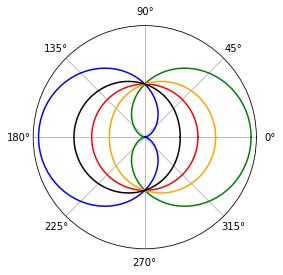

In [309]:
#vogliamo generare dei punti della funzione al variare di alfa
#la funzione è 1/2pi * (1 + a*cos(x))
#plt.rcParams["figure.figsize"] = [7.50, 3.50]
#plt.rcParams["figure.autolayout"] = True

x = np.linspace(0, 2*np.pi, 100)
def fx(a):
    return 1/(2*np.pi) * (1 + a*np.cos(x))



colors = ["green", "blue", "red", "orange","black"]

alp = [1,-1,0,1/3,-1/3]

for i in range(5):
    a = -1/3 + np.random.rand() * 2/3
        
    ax = plt.subplot(111, polar=True)
    ax.set_rticks([])
    ax.plot(x, fx(alp[i]), color=colors[i])
    
    




    

## Exercise 2 Stat | 1^st contact

Point estimate $\alpha$ = 0.08505823999999995


#### LOG LIKELY-HOOD

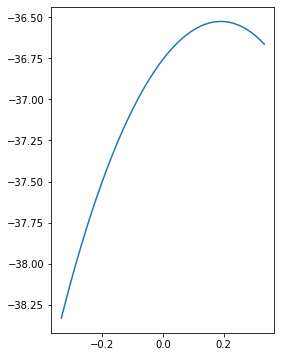

In [310]:
#let's set n to 100

xn = [1.7, 5.1, 2.5, 5.6, 6, 0.3, 3.3, 5.7, 3.5, 2.8, 6, 2.8, 4.4, 3.7, 0.6, 5.7, 1.4, 0.2, 1.9, 6]
def f(alpha):
    summ = 0 
    for el in xn:
        summ += np.log(1/(2*np.pi) * (1 + alpha*np.cos(el)))
      
    return summ
               

def log_likelihood(x): #we define Xn to be the set of the n IID measurement
    # una lista di termini 
    y = []
    for el in x:
        y.append(1/(2*np.pi) * (1 + alpha*np.cos(el)))
        summ = sum(y)
    return summ



alpha = np.linspace(-1/3,1/3,200)



plt.rcParams['figure.figsize'] = [4, 6]
plt.plot(alpha,f(alpha))   
 

In [311]:

# L-BFGS
from scipy.optimize import minimize
from scipy.optimize import Bounds

#lo applichiamo brutalmente sulla log-likelihood
#search space

def obj(alp):
    summ = 0
    for el in xn:
        
            
        summ -= np.log(1/(2*np.pi) * (1 + alp*np.cos(el)))
        
    
    return summ
    



r_min, r_max = -1/3, 1/3
pt = r_min + np.random.rand() * (r_max - r_min)
# rand_ind = int(np.random.rand() * 20)
# pt = xn[rand_ind]
# print(pt)



result = minimize(obj, pt, method = "L-BFGS-B", bounds = [(-1/3,1/3)] )

# Take a look
print('Status : %s' % result['message'])
print('Total Evaluations: %d' % result['nfev'])

# Solution
solution = result['x']
evaluation = obj(solution)
print('Solution: f(%s) = %.5f' % (solution, -evaluation))

Status : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
Total Evaluations: 10
Solution: f([0.19073083]) = -36.52599


In [312]:
pt = r_min + np.random.rand() * (r_max - r_min)
def der(alp):
    summ = 0
    for el in xn:
        summ += np.cos(el)/(1 + alp * np.cos(el))
    return -summ
result = minimize(obj, pt, method = "L-BFGS-B", jac = der, bounds = [(-1/3,1/3)] )

# Take a look
print('Status : %s' % result['message'])
print('Total Evaluations: %d' % result['nfev'])

# Solution
solution = result['x']
evaluation = obj(solution)
print('Solution: f(%s) = %.5f' % (solution, -evaluation))

Status : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
Total Evaluations: 5
Solution: f([0.19073117]) = -36.52599


## Exercise 3: Groupify!



In [313]:
import pandas as pd
df = pd.read_csv("cars2021.csv")
df = df[df.make == "Toyota"]
df

,make,model,displacement,number_cyl,number_gears,city_mpg,hwy_mpg
66,Toyota,LC 500 CONVERTIBLE,5.0,8,10,15,25
132,Toyota,LC 500,5.0,8,10,16,25
133,Toyota,LC 500h,3.5,6,10,26,34
134,Toyota,RC 300,2.0,4,8,21,31
135,Toyota,RC 300 AWD,3.5,6,6,19,26
...,...,...,...,...,...,...,...
809,Toyota,4RUNNER 4WD,4.0,6,5,16,19
810,Toyota,HIGHLANDER HYBRID AWD,2.5,4,6,35,35
811,Toyota,HIGHLANDER HYBRID AWD LTD/PLAT,2.5,4,6,35,34
812,Toyota,LAND CRUISER WAGON 4WD,5.7,8,8,13,17


<AxesSubplot:>

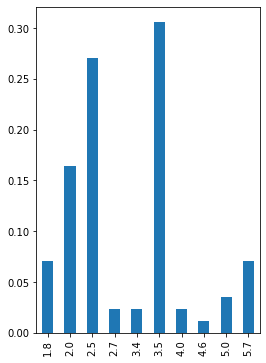

In [314]:
obs_freq = df.displacement.value_counts(normalize=True).sort_index()
obs_freq.plot(kind='bar', label = "Obs Freq.")

<AxesSubplot:>

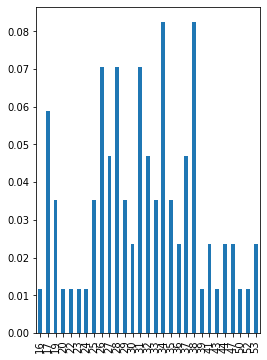

In [315]:
obs_freq = df.hwy_mpg.value_counts(normalize=True).sort_index()
obs_freq.plot(kind='bar', label = "Obs Freq.")

,displacement,hwy_mpg
66,5.0,25
132,5.0,25
133,3.5,34
134,2.0,31
135,3.5,26
...,...,...
809,4.0,19
810,2.5,35
811,2.5,34
812,5.7,17


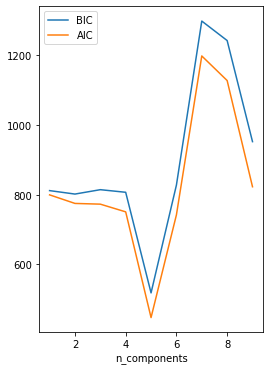

In [321]:
from sklearn import mixture
import numpy as np
from sklearn.model_selection import train_test_split
df = df[["displacement","hwy_mpg"]]

df_tr, df_te = train_test_split(df, test_size = 0.30)
# Fit the models (on training)
n_components = np.arange(1, 10)
models = [mixture.GaussianMixture(n_components = n, covariance_type='full').fit(df_tr)
          for n in n_components]
plt.plot(n_components, [m.bic(df) for m in models], label='BIC')
plt.plot(n_components, [m.aic(df) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
df

[GaussianMixture(), GaussianMixture(n_components=2), GaussianMixture(n_components=3), GaussianMixture(n_components=4), GaussianMixture(n_components=5), GaussianMixture(n_components=6), GaussianMixture(n_components=7), GaussianMixture(n_components=8), GaussianMixture(n_components=9)]
[GaussianMixture(), GaussianMixture(n_components=2), GaussianMixture(n_components=3), GaussianMixture(n_components=4), GaussianMixture(n_components=5), GaussianMixture(n_components=6), GaussianMixture(n_components=7), GaussianMixture(n_components=8), GaussianMixture(n_components=9)]
None
None
None
None
None
None
None
None
None
66     25
132    25
133    34
134    31
135    26
       ..
809    19
810    35
811    34
812    17
813    17
Name: hwy_mpg, Length: 85, dtype: int64


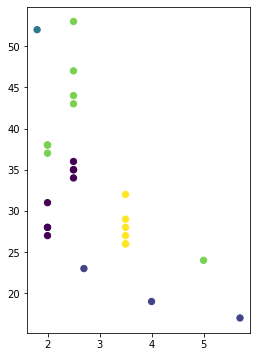

In [323]:
print( models )
#labels = models[6].predict(df_te)
print( models )
mod = models[5].predict(df_te)

for m in models:
    print(m.random_state)
print(df.hwy_mpg)
plt.scatter(df_te.displacement, df_te.hwy_mpg, c=mod, s=40, cmap='viridis')

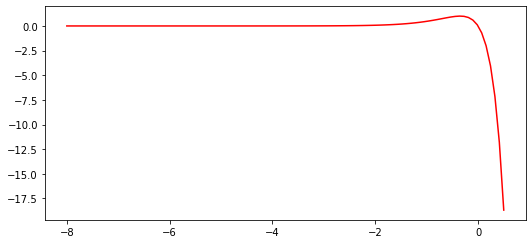

In [409]:
#4e^2x - 4e^4x

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

def funzione(x):
   return 4*np.exp(2*x) -4*np.exp(4*x)

x = np.linspace(-8,0.5,100)

plt.plot(x, funzione(x), color='red')

plt.show()

